In [36]:
# For some reason the event logs are empty. Luckily I saved the print outputs from each training session
from tbparse import SummaryReader
log_dir = os.path.join('middle_bound.Tv')
reader = SummaryReader(log_dir)

df = SummaryReader.get_tags(reader)
print(df)
df = reader.text
print(df)

{'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'tensors': [], 'hparams': [], 'text': []}
Empty DataFrame
Columns: []
Index: []


In [2]:
# extract data from print logs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

lower_bound = 0
files = ['lower_bound.txt', 'middle.txt', 'upper_bound.txt']
# format is train_entropy, train_iou, valid_entropy, valid_train
lower = [[],[], [], []]
middle = [[],[], [], []]
upper = [[],[], [], []]

def match_array(file_index, entropy, iou, is_valid=False):
    v = is_valid*2
    match(file_index):
        case 0:
            lower[0+v].append(entropy)
            lower[1+v].append(iou)
        case 1:
            middle[0+v].append(entropy)
            middle[1+v].append(iou)
        case 2:
            upper[0+v].append(entropy)
            upper[1+v].append((iou))


for i, file in enumerate(files):
    with open(file) as f:
        for line in (f):
            if line[0:7] == '[train]':
                entropy, iou = re.findall("\d+\.\d+", line)
                match_array(i, entropy, iou)
            if line[0:7] == '[valid]':
                entropy, iou = re.findall("\d+\.\d+", line)
                match_array(i, entropy, iou, True)


In [3]:

key = {
    'lower_train_entropy' : lower[0],
    'lower_train_iou' : lower[1],
    'lower_valid_entropy':lower[2],
    'lower_valid_iou': lower[3],
    
    'middle_train_entropy' : middle[0],
    'middle_train_iou' : middle[1],
    'middle_valid_entropy':middle[2],
    'middle_valid_iou': middle[3],

    'upper_train_entropy' : upper[0],
    'upper_train_iou' : upper[1],
    'upper_valid_entropy':upper[2],
    'upper_valid_iou': upper[3],
}
df = pd.DataFrame(key)
df = df.astype(float)

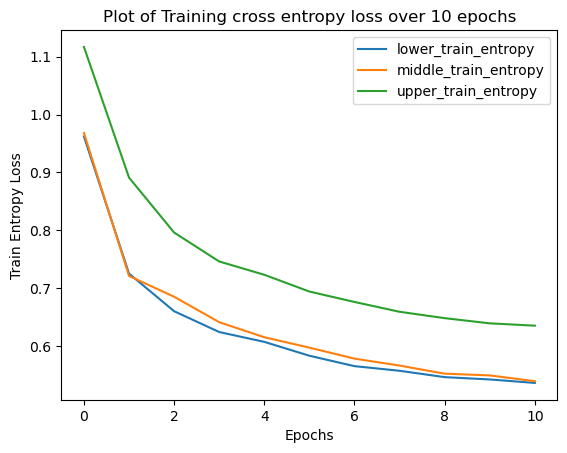

In [6]:
df.loc[:,['lower_train_entropy', 'middle_train_entropy', 'upper_train_entropy']].plot()
plt.xlabel('Epochs')
plt.ylabel('Train Entropy Loss')
plt.title('Plot of Training cross entropy loss over 10 epochs')
txt="Oddly the upper bound has the least entropy loss, the middle and lower training models score better on training data"
#plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.1, '')

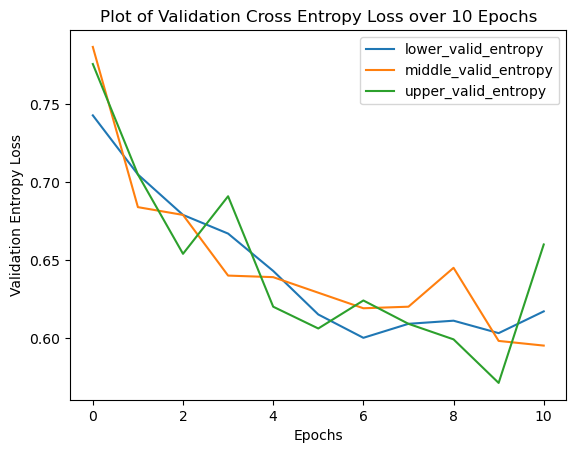

In [5]:
df.loc[:,['lower_valid_entropy', 'middle_valid_entropy', 'upper_valid_entropy']].plot()
plt.xlabel('Epochs')
plt.ylabel('Validation Entropy Loss')
plt.title('Plot of Validation Cross Entropy Loss over 10 Epochs')
txt=""
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.1, '')

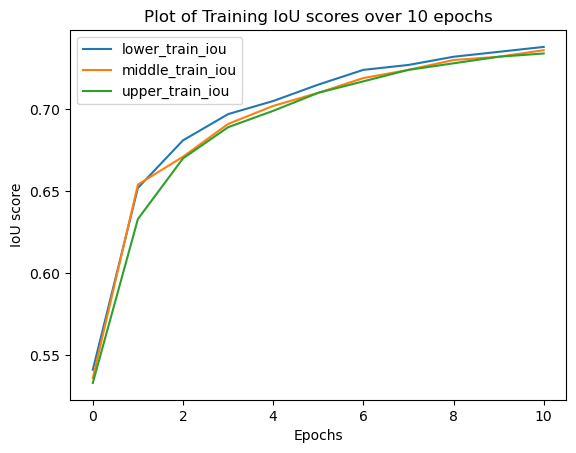

In [58]:
df.loc[:,['lower_train_iou', 'middle_train_iou', 'upper_train_iou']].plot()
plt.xlabel('Epochs')
plt.ylabel('IoU score')
plt.title('Plot of Training IoU scores over 10 epochs')
txt=""
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.1, '')

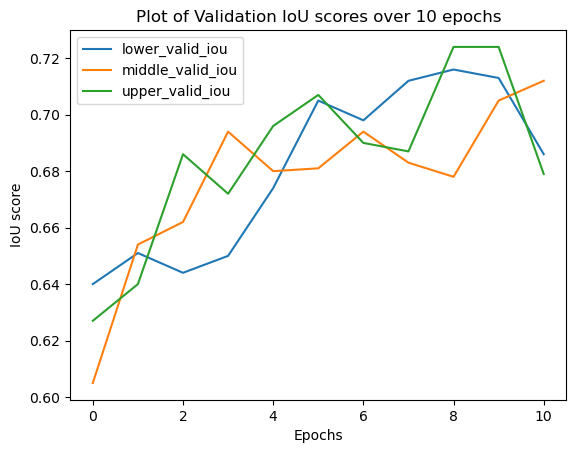

In [55]:
df.loc[:,['lower_valid_iou', 'middle_valid_iou', 'upper_valid_iou']].plot()
plt.xlabel('Epochs')
plt.ylabel('IoU score')
plt.title('Plot of Validation IoU scores over 10 epochs')
txt=""
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [62]:
df

,lower_train_entropy,lower_train_iou,lower_valid_entropy,lower_valid_iou,middle_train_entropy,middle_train_iou,middle_valid_entropy,middle_valid_iou,upper_train_entropy,upper_train_iou,upper_valid_entropy,upper_valid_iou
0,0.962,0.541,0.743,0.640,0.968,0.536,0.787,0.605,1.117,0.533,0.776,0.627
1,0.725,0.652,0.705,0.651,0.721,0.654,0.684,0.654,0.891,0.633,0.705,0.640
2,0.660,0.681,0.679,0.644,0.685,0.671,0.679,0.662,0.796,0.670,0.654,0.686
3,0.624,0.697,0.667,0.650,0.641,0.691,0.640,0.694,0.746,0.689,0.691,0.672
4,0.607,0.705,0.643,0.674,0.615,0.702,0.639,0.680,0.723,0.699,0.620,0.696
5,0.583,0.715,0.615,0.705,0.597,0.710,0.629,0.681,0.694,0.710,0.606,0.707
6,0.565,0.724,0.600,0.698,0.578,0.719,0.619,0.694,0.676,0.717,0.624,0.690
7,0.557,0.727,0.609,0.712,0.566,0.724,0.620,0.683,0.659,0.724,0.609,0.687
8,0.546,0.732,0.611,0.716,0.552,0.730,0.645,0.678,0.648,0.728,0.599,0.724
9,0.542,0.735,0.603,0.713,0.549,0.732,0.598,0.705,0.639,0.732,0.571,0.724
